In [18]:
# Importig Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [22]:
# Loading data
train_data = pd.read_excel('/content/SalaryData_Train.xlsx')
test_data = pd.read_csv('/content/SalaryData_Test.csv')

EDA & Data Preprocessing

In [23]:
train_data.shape

(27284, 14)

In [24]:
test_data.shape

(20805, 14)

In [25]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [26]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [27]:
# Checking for null values
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       1
relationship     1
race             1
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [28]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           1
Salary           1
dtype: int64

In [29]:
train_data.dtypes

age                int64
workclass         object
education         object
educationno        int64
maritalstatus     object
occupation        object
relationship      object
race              object
sex               object
capitalgain      float64
capitalloss      float64
hoursperweek     float64
native            object
Salary            object
dtype: object

In [31]:
# frequency for categorical fields 
category_col =['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary'] 
for c in category_col:
    print (c)
    print (train_data[c].value_counts())
    print('\n')

workclass
 Private             20143
 Self-emp-not-inc     2278
 Local-gov            1867
 State-gov            1147
 Self-emp-inc          981
 Federal-gov           855
 Without-pay            13
Name: workclass, dtype: int64


education
 HS-grad         8944
 Some-college    6034
 Bachelors       4575
 Masters         1457
 Assoc-voc       1166
 11th             950
 Assoc-acdm       896
 10th             742
 7th-8th          515
 Prof-school      481
 9th              412
 Doctorate        342
 12th             334
 5th-6th          267
 1st-4th          129
 Preschool         40
Name: education, dtype: int64


maritalstatus
 Married-civ-spouse       12687
 Never-married             8812
 Divorced                  3811
 Separated                  860
 Widowed                    758
 Married-spouse-absent      336
 Married-AF-spouse           19
 Never-mar                    1
Name: maritalstatus, dtype: int64


occupation
 Craft-repair         3657
 Prof-specialty       3631
 Exe

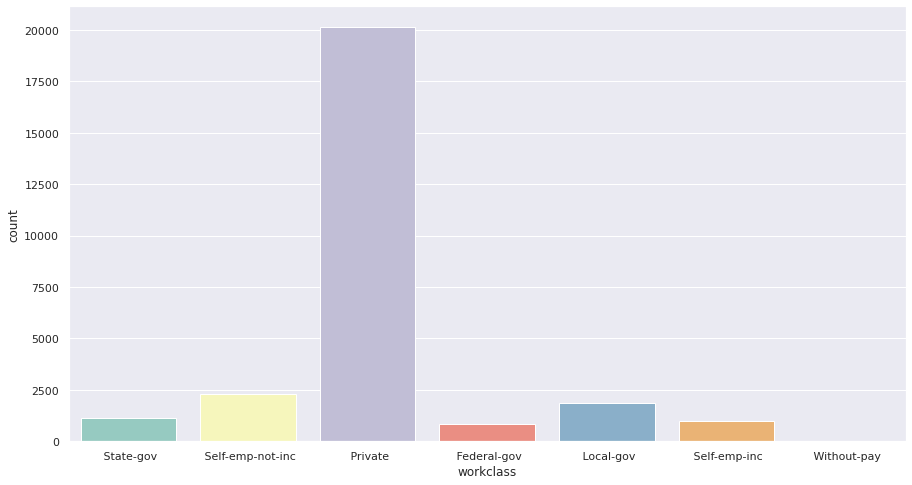

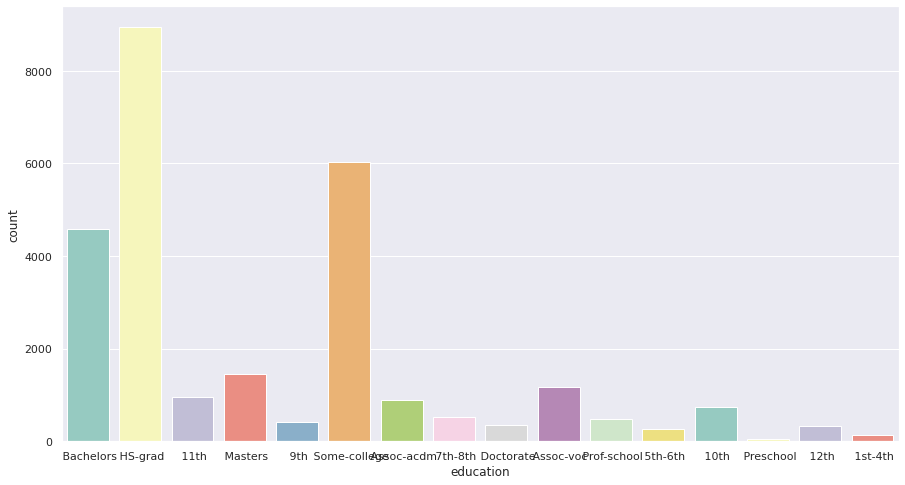

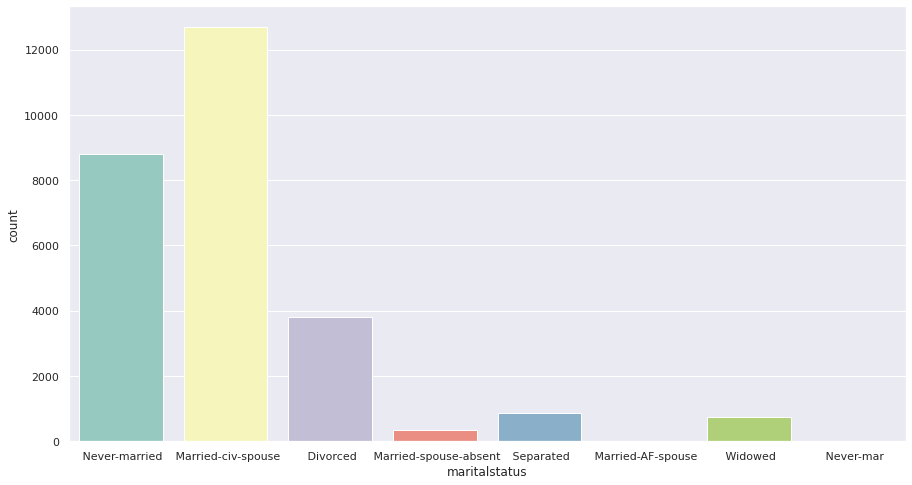

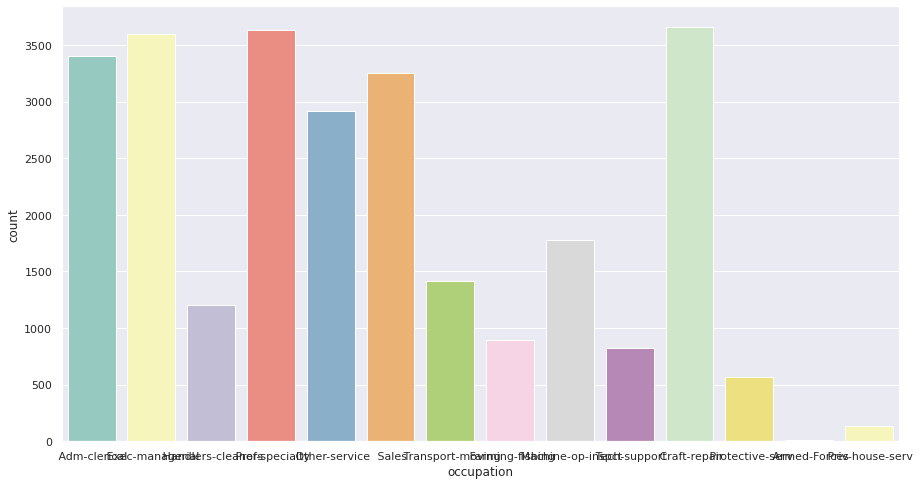

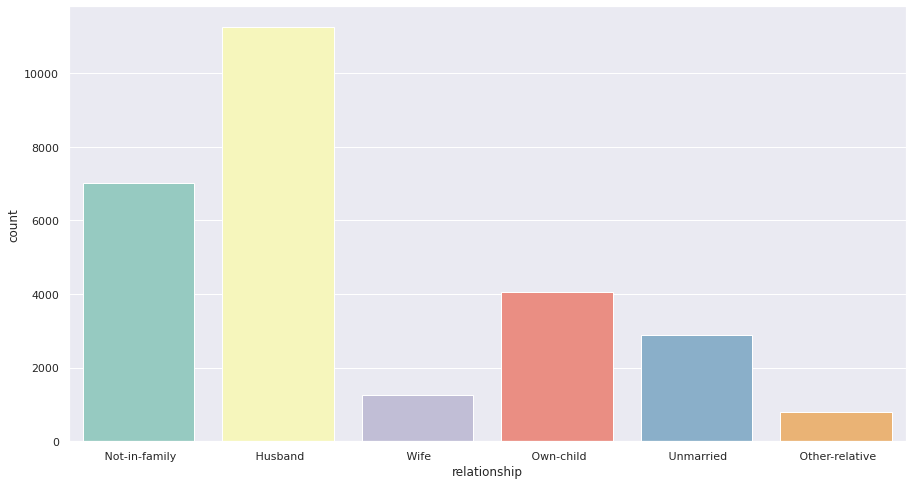

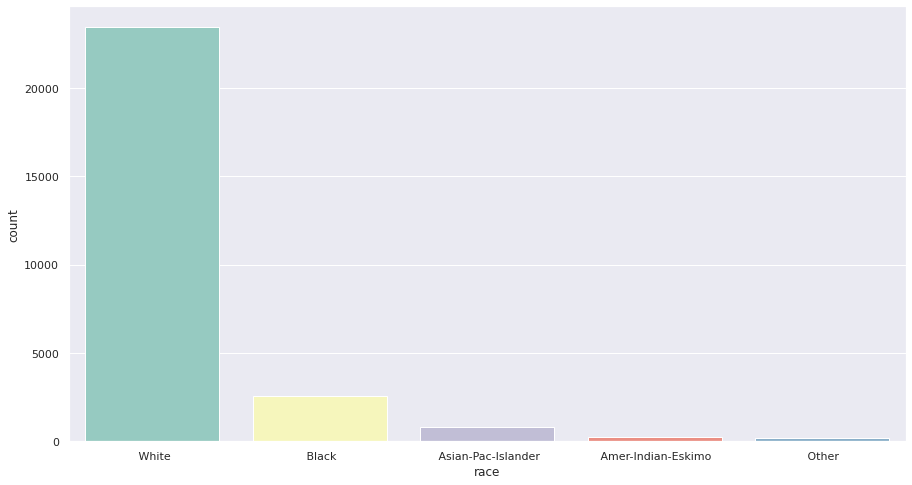

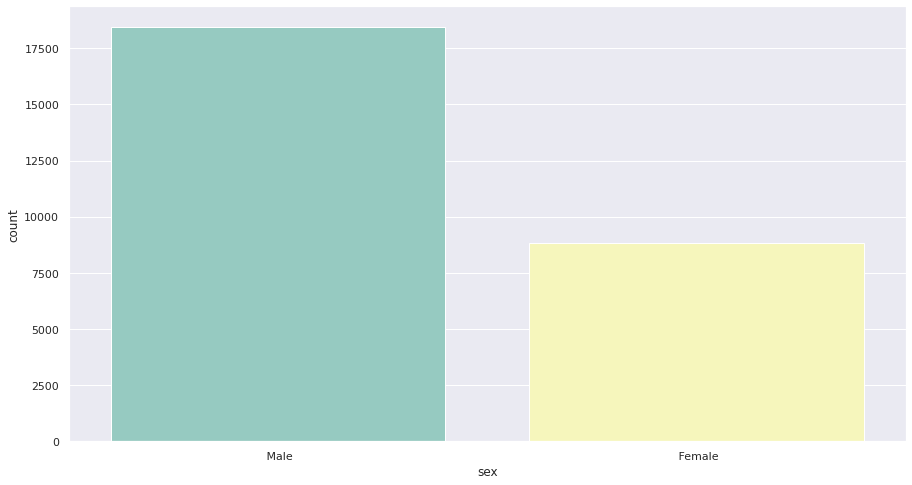

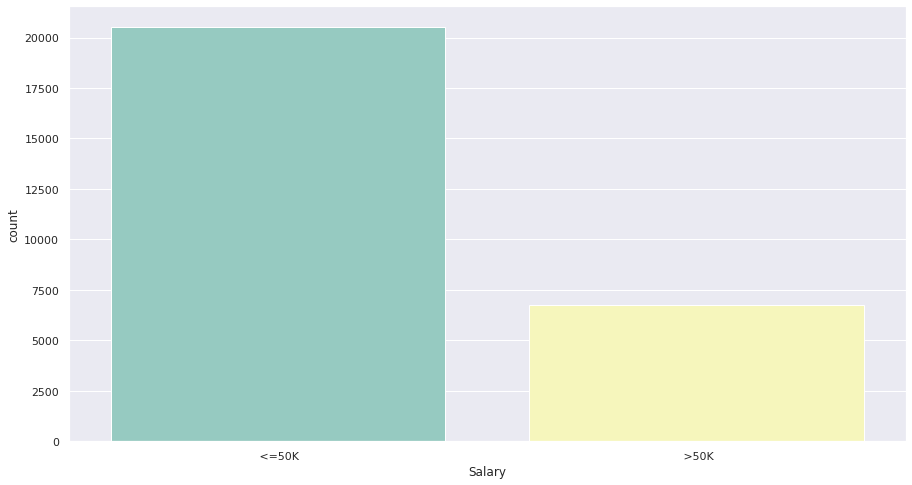

In [32]:
# countplot for all categorical columns
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
cat_col = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in cat_col:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x = col, data = train_data, palette = 'Set3');

In [33]:
# printing unique values from each categoricla columns

print('workclass',train_data.workclass.unique())
print('education',train_data.education.unique())
print('maritalstatus',train_data['maritalstatus'].unique())
print('occupation',train_data.occupation.unique())
print('relationship',train_data.relationship.unique())
print('race',train_data.race.unique())
print('sex',train_data.sex.unique())
print('native',train_data['native'].unique())
print('Salary',train_data.Salary.unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
maritalstatus [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'
 ' Never-mar']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv' nan]
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative' nan]
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'
 nan]
sex [' Male' ' Female' nan]
native [' United-States' ' Cuba' ' Jamaica' ' India' ' Mex

In [34]:
train_data[['Salary', 'age']].groupby(['Salary'], as_index=False).mean().sort_values(by='age', ascending=False)

,Salary,age
1,>50K,43.968090
0,<=50K,36.631422


<Figure size 1440x360 with 0 Axes>

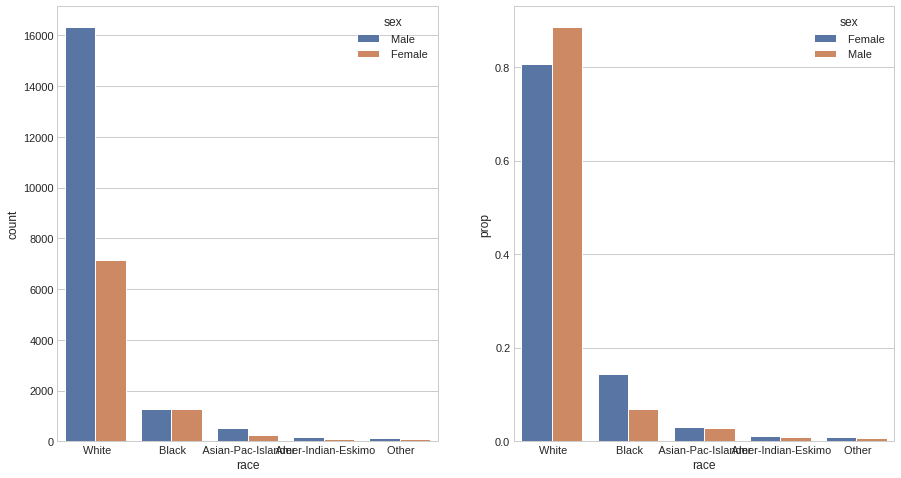

In [35]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=train_data, ax=axes[0])

prop_df = (train_data[x]
           .groupby(train_data[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


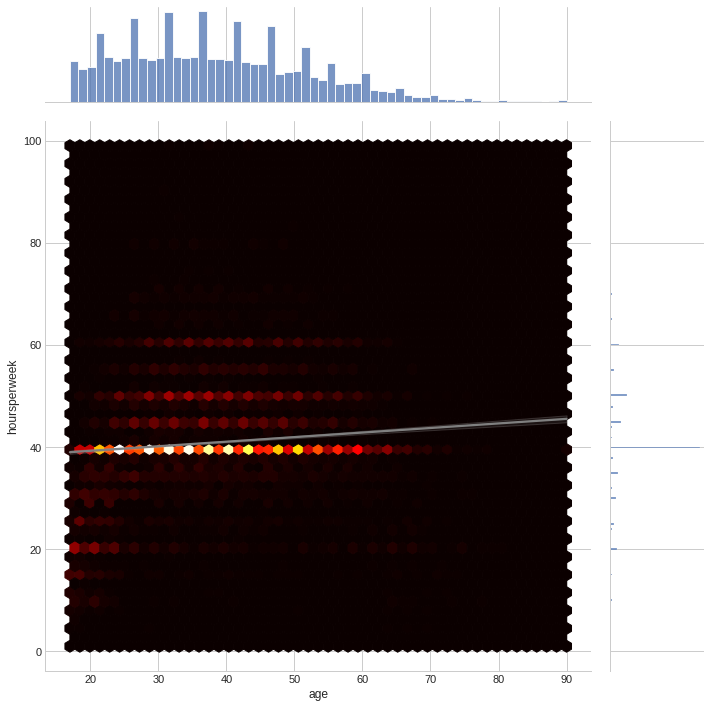

In [36]:
g = sns.jointplot(x = 'age', 
              y = 'hoursperweek',
              data = train_data, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)

#http://stackoverflow.com/questions/33288830/how-to-plot-regression-line-on-hexbins-with-seaborn
sns.regplot(train_data.age, train_data['hoursperweek'], ax=g.ax_joint, scatter=False, color='grey')

Feature encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
train_data = train_data.apply(LabelEncoder().fit_transform)
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,5,0,1,4,1,23,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [39]:
test_data = test_data.apply(LabelEncoder().fit_transform)
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,14,4,6,4,2,1,0,1,35,37,0
1,21,2,11,16,2,4,1,4,1,0,1,46,37,0
2,11,1,7,4,2,10,1,4,1,0,1,35,37,1
3,27,2,16,2,2,6,1,2,1,88,1,35,37,1
4,17,2,0,13,4,7,2,4,1,0,1,24,37,0


Test-Train-Split

In [40]:
drop_elements = ['education', 'native', 'Salary']
X = train_data.drop(drop_elements, axis=1)

In [41]:
y = train_data['Salary']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Building Multinomial Naive Bays Model

In [43]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(X_train, y_train)

MultinomialNB()

In [44]:
score_multinomial = classifier_mb.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_multinomial)

The accuracy of Gaussian Naive Bayes is 0.7717681030653043


Testing Multinomial Naive Bays model on SalaryData_Test.csv

In [45]:
from sklearn import metrics

drop_elements = ['education', 'native', 'Salary']
X_new = test_data.drop(drop_elements, axis=1)

y_new = test_data['Salary']

In [55]:
# make predictions
new_prediction = classifier_mb.predict(X_new)
# summarize the fit of the model
print(metrics.classification_report(y_new, new_prediction))
print(metrics.confusion_matrix(y_new, new_prediction))

print("Accuracy:",metrics.accuracy_score(y_new, new_prediction))
print("Precision:",metrics.precision_score(y_new, new_prediction, pos_label='positive',average='micro'))
print("Recall:",metrics.recall_score(y_new, new_prediction,pos_label='positive',average='micro'))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87     15694
           1       0.61      0.30      0.40      5110
           2       0.00      0.00      0.00         1

    accuracy                           0.78     20805
   macro avg       0.47      0.41      0.42     20805
weighted avg       0.76      0.78      0.75     20805

[[14697   997     0]
 [ 3579  1531     0]
 [    1     0     0]]
Accuracy: 0.7800048065368902
Precision: 0.7800048065368902
Recall: 0.7800048065368902


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Building Gaussian Naive Bays Model

In [56]:
# Gaussian Naive Bayes
classifier_gb = GB()
classifier_gb.fit(X_train, y_train)

GaussianNB()

In [57]:
score_gaussian = classifier_gb.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.8046423811639272



Testing Gaussian Naive Bays model on SalaryData_Test.csv

In [58]:
# make predictions
new_prediction = classifier_gb.predict(X_new)
# summarize the fit of the model
print(metrics.classification_report(y_new, new_prediction))
print(metrics.confusion_matrix(y_new, new_prediction))

print("Accuracy:",metrics.accuracy_score(y_new, new_prediction))
print("Precision:",metrics.precision_score(y_new, new_prediction, pos_label='positive',average='micro'))
print("Recall:",metrics.recall_score(y_new, new_prediction, pos_label='positive',average='micro'))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85     15694
           1       0.51      0.41      0.46      5110
           2       0.00      0.00      0.00         1

    accuracy                           0.76     20805
   macro avg       0.44      0.43      0.43     20805
weighted avg       0.74      0.76      0.75     20805

[[13719  1975     0]
 [ 3014  2096     0]
 [    1     0     0]]
Accuracy: 0.7601538091804855
Precision: 0.7601538091804855
Recall: 0.7601538091804855


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat